In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
M0 = pd.read_csv('../../19_de_abril/M0/M0-polrad_0_d2.txt', sep='\s+')
M1 = pd.read_csv('../../19_de_abril/M1/M0-polrad_1_d2.txt', sep='\s+')
M2 = pd.read_csv('../../19_de_abril/M2/M0-polrad_2_d2.txt', sep='\s+')
M3 = pd.read_csv('../../19_de_abril/M3/M0-polrad_3_d2.txt', sep='\s+')
M4 = pd.read_csv('../../19_de_abril/M4/M0-polrad_4_d2.txt', sep='\s+')
M5 = pd.read_csv('../../19_de_abril/M5/M0-polrad_5_d2.txt', sep='\s+')
M6 = pd.read_csv('../../19_de_abril/M6/M0-polrad_6_d2.txt', sep='\s+')
M7 = pd.read_csv('../../19_de_abril/M7/M0-polrad_7_d2.txt', sep='\s+')
M8 = pd.read_csv('../../19_de_abril/M8/M0-polrad_8_d2.txt', sep='\s+')


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\guill\AppData\Local\Temp\ipykernel_23360\2270072126.py:1: SyntaxWarning: invalid escape seq

In [3]:

exp = pd.DataFrame()

df_exp = pd.read_csv('../Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
df_exp = df_exp.replace('--',np.nan).dropna()
rest_df_exp = df_exp["G(r)"].iloc[1::2].astype(float)
rest_df_exp = rest_df_exp.reset_index(drop=True)
rest_df_exp.index *= 0.02

exp['exp'] = rest_df_exp

print(exp.to_string)

dx = 0.02

<bound method DataFrame.to_string of             exp
0.00   0.000074
0.02   0.000138
0.04   0.000181
0.06   0.000197
0.08   0.000181
...         ...
59.90 -0.000032
59.92  0.000279
59.94  0.000798
59.96  0.001480
59.98  0.002280

[3000 rows x 1 columns]>


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\guill\AppData\Local\Temp\ipykernel_23360\1646973017.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_exp = pd.read_csv('../Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])


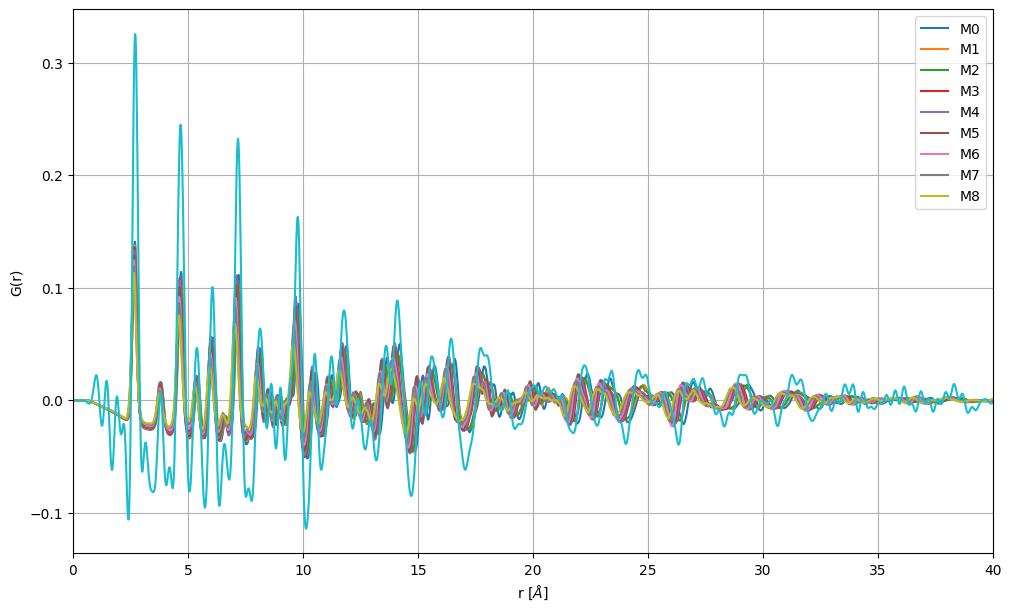

In [4]:

fig, ax = plt.subplots(figsize=(10,6), layout='constrained' )

x = 0.0
ax.plot(M0['#r(A)'],M0['G(r)']+0*x, label='M0')
ax.plot(M1['#r(A)'],M1['G(r)']+1*x, label='M1')
ax.plot(M2['#r(A)'],M2['G(r)']+2*x, label='M2')
ax.plot(M3['#r(A)'],M3['G(r)']+3*x, label='M3')
ax.plot(M4['#r(A)'],M4['G(r)']+4*x, label='M4')
ax.plot(M5['#r(A)'],M5['G(r)']+5*x, label='M5')
ax.plot(M6['#r(A)'],M6['G(r)']+6*x, label='M6')
ax.plot(M7['#r(A)'],M7['G(r)']+7*x, label='M7')
ax.plot(M8['#r(A)'],M8['G(r)']+8*x, label='M8')
ax.plot(exp.index, exp['exp'])

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,40])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

In [5]:
M = pd.DataFrame()
#M.index = M0['#r(A)']
M['M0'] = M0['G(r)']
M['M1'] = M1['G(r)']
M['M2'] = M2['G(r)']
M['M3'] = M3['G(r)']
M['M4'] = M4['G(r)']
M['M5'] = M5['G(r)']
M['M6'] = M6['G(r)']
M['M7'] = M7['G(r)']
M['M8'] = M8['G(r)']

ScaleX= 1.0
#M.index *= dx*ScaleX
M.index = (M.index + 1)*dx*ScaleX

for i in range(9):
    a = M[M[f'M{i}']== max(M[f'M{i}'])].index[0]
    b = 0.31 #### Al parecer este es el originario de todo lo que yo estaba haciendo
    c = b/(float(M[f'M{i}'][a]))
    M[f'M{i}'] *= c
    print(f'Modelo {i} tiene f-escala:{c}')



Modelo 0 tiene f-escala:2.201548185498189
Modelo 1 tiene f-escala:2.2524158976967232
Modelo 2 tiene f-escala:2.2849561435836954
Modelo 3 tiene f-escala:2.2824326314239434
Modelo 4 tiene f-escala:2.329425909227532
Modelo 5 tiene f-escala:2.4177195445328343
Modelo 6 tiene f-escala:2.4953714883683493
Modelo 7 tiene f-escala:2.6078909733322115
Modelo 8 tiene f-escala:2.738757840798657


In [9]:

F = pd.DataFrame()
exp = exp.astype(float)
M.astype(float)
F = M.join(exp, how='outer')

for i in range(9):
    F[f'M{i}'].loc[0] = 0

F = F.interpolate(method='quadratic')
#F['M0'] = F['M0'].interpolate(method='zero')
#F = F.fillna(method='ffill') 
#F = F.fillna(0)
print(len(F), F.iloc[60])

for i in range(9):
    rest = F['exp'] - F[f'M{i}']
    error1 = np.sum(rest.loc[:60]**2)
    error_p1 = np.sqrt(error1/3000)
    #error2 = np.sum(rest.loc[44:]**2)
    #error_p2 = np.sqrt(error2/4321)
    #print(f'Para M{i} el error 1er es {error1}, el segundo es {error2}, y el error porcentual es {error_p1} y {error_p2}')
    print(f'Para M{i} el error es {error1}, y ECM {error_p1}')

#print(F.to_string())

fig = px.line(F, template='simple_white', title='Pair Distribution Functions of 9 Models',
    width=1000, height=500)
fig.update_layout(
    font_family="serif",
    title_font_family="serif")
fig.update_xaxes(title_text='G(r)')
fig.update_yaxes(title_text='r [A]')
fig.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_23360\2335229434.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\guill\AppData\Local\Temp\ipykernel_23360\2335229434.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change

3000 M0    -0.011690
M1    -0.011713
M2    -0.011722
M3    -0.011732
M4    -0.011857
M5    -0.012185
M6    -0.012477
M7    -0.012909
M8    -0.013475
exp   -0.014510
Name: 1.2, dtype: float64
Para M0 el error es 0.8523149605954138, y ECM 0.01685541417067934
Para M1 el error es 0.34896116336179184, y ECM 0.01078519298794713
Para M2 el error es 0.35017858387725365, y ECM 0.010803989754981778
Para M3 el error es 1.1751857445522769, y ECM 0.019792134334563963
Para M4 el error es 1.77145752977626, y ECM 0.0242999144701942
Para M5 el error es 2.105861499899368, y ECM 0.026494411359752633
Para M6 el error es 2.2365588286997373, y ECM 0.027304204979573733
Para M7 el error es 2.9359613728119323, y ECM 0.0312834427603055
Para M8 el error es 2.832931197210973, y ECM 0.030729633890925617


### Cuando Yfactor = 0.31*max

Para M8 encaja mejor (e=0.6872) cuando Xfactor = 1.018  9.2/10

Para M7 encaja mejor (e=0.7456) cuando Xfactor = 1.015  8.9/10

Para M6 el error es 0.8316164851245023, y ECM 0.013872968869178593 cuando Xfactor = 1.01 6/10

Para M3 el error es 0.8136062566711434, y ECM 0.013721923907087718 cuando Xfactor = 1.007 8.5/10

Para M2 el error es 0.7088176728888609, y ECM 0.012807817642117197 cuando Xfactor = 1.001 8/10 

Para M1 el error es 0.343569674329813, y ECM 0.008916928380350186 cuando Xfactor = 1 8.3/10


### Para los mejores valores de Xfactor por modelo, el mejor Yfactor es:

Para M8 el error es 0.535589639045323, y ECM 0.011133300988126987 con Y=0.34 9.2/10 el factor de escala es 2.84 en Y

Para M3 el error es 0.7923845371465926, y ECM 0.013541783394788199 con Y = 0.29 9/10

Para M2 el error es 0.35472649818514024, y ECM 0.009060552531146713 con Y = 0.29 X = 1 8/10

<b> Para M1 el error es 0.343569674329813, y ECM 0.008916928380350186 con Y = 0.31 X=1  8/10 <b>




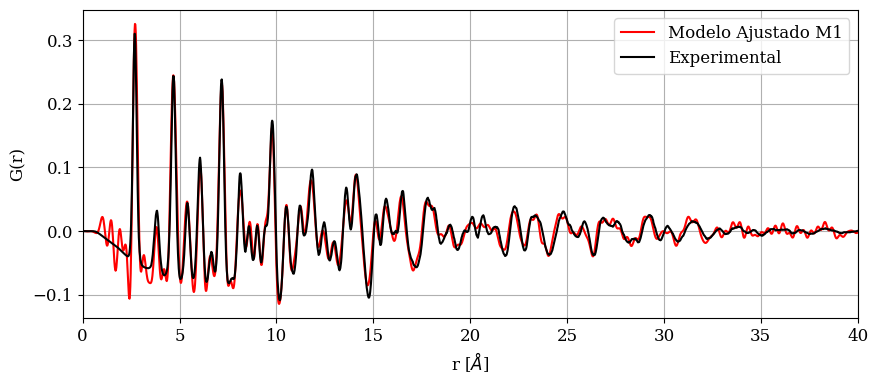

In [8]:

fig, ax =plt.subplots(figsize=(10,4))
ax.plot(F.index, F['exp'], label='Modelo Ajustado M1', color='red')
ax.plot(F.index , F['M1'], label = 'Experimental', color='black')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,40])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

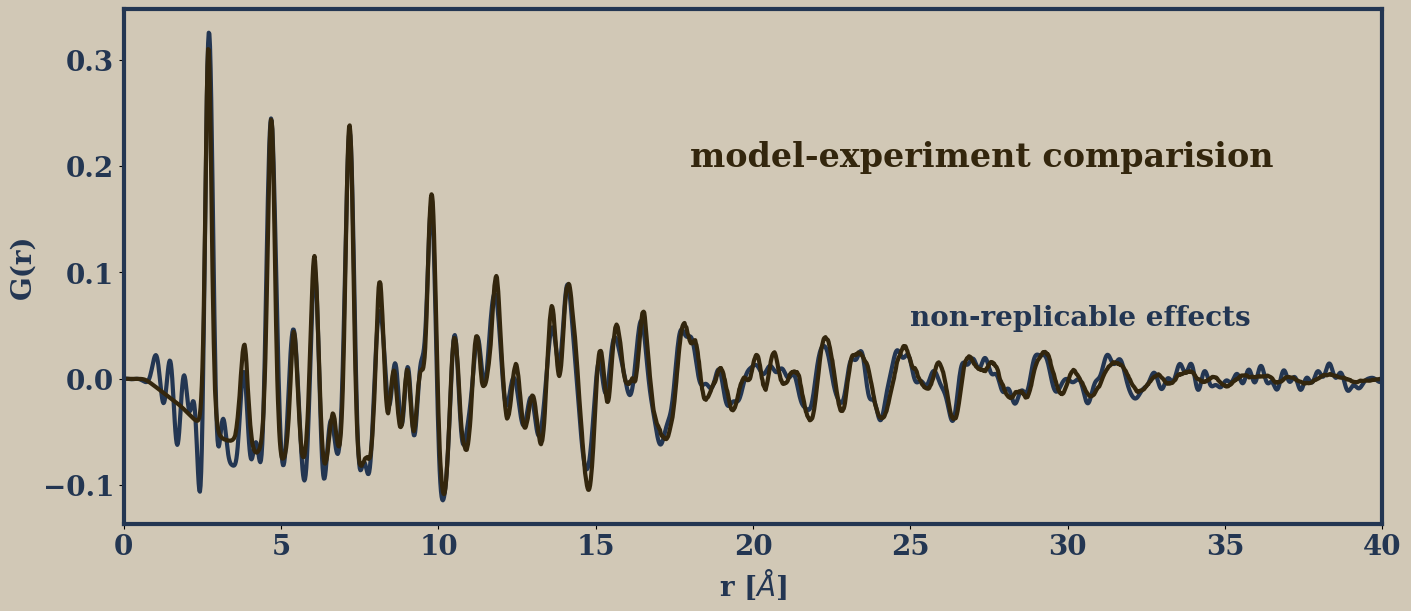

In [31]:
blue = '#233652'
brown = '#33260D'
lightblue = '#B6C1D1'


fig, ax =plt.subplots(figsize=(14,6), layout='constrained', facecolor='#D1C8B6')
ax.plot(F.index, F['exp'], label='Modelo Ajustado M1', color=blue, lw=3)
ax.plot(F.index , F['M1'], label = 'Experimental', color=brown, lw=3)


ax.set_xlabel('r [$\\AA$]', color=blue, weight='bold')
ax.set_facecolor('#D1C8B6')
ax.set_xlim([0,40])


ax.text(*[25,0.05], 'non-replicable effects', fontsize=20, rotation_mode='anchor', color = blue)
ax.text(*[18,0.2], 'model-experiment comparision', fontsize=24, rotation_mode='anchor', color = brown)


#ax.set_ylim([-0.125,0.25])
ax.set_ylabel('G(r)', color=blue, weight='bold')
ax.tick_params(labelcolor=blue)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_color(blue)
    ax.spines[axis].set(linewidth = 3)



plt.rc('font', size=20, weight='bold')
plt.rcParams['font.family']='serif'
plt.show()